In [1]:
# literature link: https://nznano.blogspot.com/2018/03/simple-quantum-chemistry-hartree-fock.html

In [2]:
# Need to import some libraries to have the maths functions and plotting
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
%matplotlib notebook             
# Allows plotting in the notebook

<IPython.core.display.Javascript object>


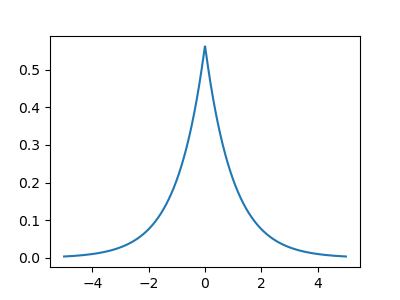

In [3]:
# PLotting slater type orbitals for 1s orbital
# Formula: psiSTO(r) = (zeta**3/pi)**(0.5)*e**(-zeta*r) where r is the radius
x = np.linspace(-5,5,num=1000)
r = abs(x)

zeta = 1.0

Ψ_STO = (zeta**3/np.pi)**(0.5)*np.exp(-zeta*r)

plt.figure(figsize=(4,3))
plt.plot(x,Ψ_STO)




[] for super script and {} for subscript

Slater type orbitals (STO) are the exact solutions for the hydrogen atom and provide an accurate basis set 
for many electron molecules however the calculations of the integrals are expensive as their is no simple 
exact solution for the integrals. One way around this is to approximate the Slater type orbitals using a 
sum of contracted Gaussian functions (CGF). There are simple analytical expressions for the integrals between 
two Gaussians so this can save a lot of computing time. Let's look at this for the case of the 1s orbital

ϕGF(α)=(2α/π)**(3/4)*exp**(−αr2)
 
ϕCGF(r)=∑[sub(n)]{sup(3)}dnϕ[sup(GF)]{sub(n)}(α)   # COntracted gaussian
 
We will make use of three Gaussians to approximate the slater type orbitals.

ϕ[CGF]{STO−3G}(r)=∑{n}[3]dnϕ[GF]{n}(α)   # Using three gaussians to approximate the slater type orbitals 





<IPython.core.display.Javascript object>


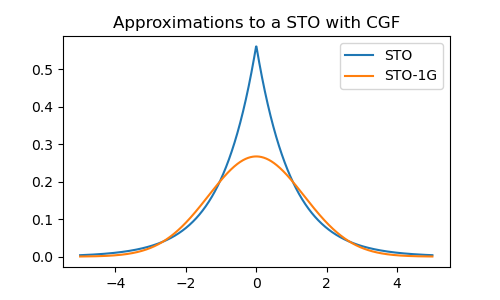

<IPython.core.display.Javascript object>


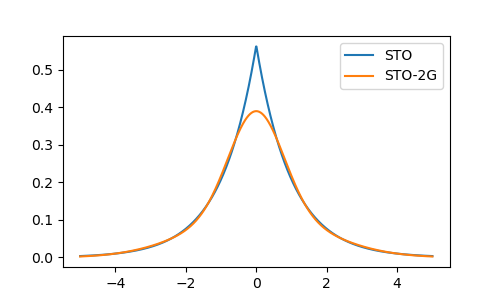

<IPython.core.display.Javascript object>


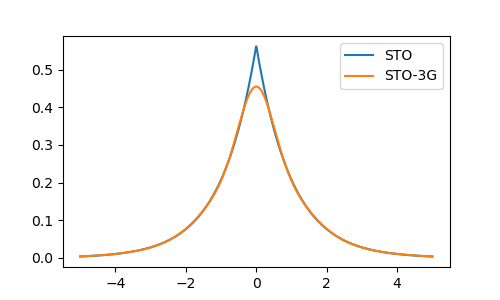



As the number of Gaussians is increased the function more closely describes the slater type orbitals. 
You will also see that nearest the centre (x=0) the approximation is poorest. 
This region is called the cusp.

We will use this very poor basis set for our HeH+ molecule for ease of calculation but for accurate calculations
at the very least a 6-311G(d,p) basis set will used which would have 6 contracted Gaussian functions to describe 
hydrogen and helium 1s orbital.




In [4]:
print("""
[] for super script and {} for subscript

Slater type orbitals (STO) are the exact solutions for the hydrogen atom and provide an accurate basis set 
for many electron molecules however the calculations of the integrals are expensive as their is no simple 
exact solution for the integrals. One way around this is to approximate the Slater type orbitals using a 
sum of contracted Gaussian functions (CGF). There are simple analytical expressions for the integrals between 
two Gaussians so this can save a lot of computing time. Let's look at this for the case of the 1s orbital

ϕGF(α)=(2α/π)**(3/4)*exp**(−αr2)
 
ϕCGF(r)=∑[sub(n)]{sup(3)}dnϕ[sup(GF)]{sub(n)}(α)   # COntracted gaussian
 
We will make use of three Gaussians to approximate the slater type orbitals.

ϕ[CGF]{STO−3G}(r)=∑{n}[3]dnϕ[GF]{n}(α)   # Using three gaussians to approximate the slater type orbitals 


""")

Coeff = np.array([[1.00000,0.0000000,0.000000],   # coeff is the dn variable in equation above
                  [0.678914,0.430129,0.000000],
                  [0.444635,0.535328,0.154329]])

Expon = np.array([[0.270950,0.000000,0.000000],    # α variable
                  [0.151623,0.851819,0.000000],
                  [0.109818,0.405771,2.227660]])

Ψ_CGF_STO1G = Coeff[0,0]*(2*Expon[0,0]/np.pi)**(0.75)*np.exp(-Expon[0,0]*r**2)

Ψ_CGF_STO2G = Coeff[1,0]*(2*Expon[1,0]/np.pi)**(0.75)*np.exp(-Expon[1,0]*r**2) \
                + Coeff[1,1]*(2*Expon[1,1]/np.pi)**(0.75)*np.exp(-Expon[1,1]*r**2) \
                + Coeff[1,2]*(2*Expon[1,2]/np.pi)**(0.75)*np.exp(-Expon[1,2]*r**2)

Ψ_CGF_STO3G = Coeff[2,0]*(2*Expon[2,0]/np.pi)**(0.75)*np.exp(-Expon[2,0]*r**2) \
                + Coeff[2,1]*(2*Expon[2,1]/np.pi)**(0.75)*np.exp(-Expon[2,1]*r**2) \
                + Coeff[2,2]*(2*Expon[2,2]/np.pi)**(0.75)*np.exp(-Expon[2,2]*r**2)

# Plot the three functions
plt.figure(figsize=(5,3))
plt.title("Approximations to a STO with CGF")
plt.plot(x,Ψ_STO,label="STO")
plt.plot(x,Ψ_CGF_STO1G,label="STO-1G")
plt.legend()

plt.figure(figsize=(5,3))
plt.plot(x,Ψ_STO,label="STO")
plt.plot(x,Ψ_CGF_STO2G,label="STO-2G")
plt.legend()

plt.figure(figsize=(5,3))
plt.plot(x,Ψ_STO,label="STO")
plt.plot(x,Ψ_CGF_STO3G,label="STO-3G")
plt.legend()

print("""

As the number of Gaussians is increased the function more closely describes the slater type orbitals. 
You will also see that nearest the centre (x=0) the approximation is poorest. 
This region is called the cusp.

We will use this very poor basis set for our HeH+ molecule for ease of calculation but for accurate calculations
at the very least a 6-311G(d,p) basis set will used which would have 6 contracted Gaussian functions to describe 
hydrogen and helium 1s orbital.

""")

In [5]:
print("""
FC=sCE - Hartree-Fock equation constituting of five matrices/tables or Roothan-Hall equations

________________________________________________________________________________________________________________
The coefficient matrix  C  is a table with  K×K  entries with coefficients where  K  are the number of electrons.

C=⎛c1,1 c1,2  ... c1,K⎞
  ⎜c2,1 c2,2  ... c2,K⎟
  ⎜ .     .         . ⎟
  ⎜ .     .  .      . ⎟
  ⎜ .     .     .   . ⎟
  ⎜ .     .        .. ⎟
  ⎝cK,1 cK,2  ... ck,k⎠
_________________________________________________________________________________________________________________
  
E  is a diagonal matrix of the energies of the molecular orbitals

C=⎛ ϵ1    0  0..     0 ⎞
  ⎜ 0    ϵ2  ...     0 ⎟
  ⎜ 0      .         . ⎟
  ⎜ .      .  .      . ⎟
  ⎜ .      .     .   . ⎟
  ⎜ .      .         . ⎟
  ⎝ 0      0   ...   ϵK⎠
  
We are trying to find out the values of  C  which minimise the energy, however,  C  is on both sides of the 
equation so we have to iterative solve the equations until the  C  on both sides are equal and the energy is the lowest 
possible this is called the self consistent field method or SCF for short.

Computers are best at solving equations in the form of  FC=CE , however, that overlap integral is a bit of a 
problem ( FC=SCE ) so we have to do some matrix MATRIX ALGEBRA to rearrange the equation into an equivalent equation  
F′C′=C′E  (where  F′=S**(−1/2)FS**(−1/2)  and  C′=S**(−1/2)C  
[In the code  S**(−1/2)  and  S**(1/2)  are denoted as X and X.T )
______________
INTEGRALS    ||
_____________||

The computation of the various integrals can be calculated as simple functions when Gaussians are used 
[for a detailed description I recommend the appendix in Modern Quantum Chemistry).

""")


FC=sCE - Hartree-Fock equation constituting of five matrices/tables or Roothan-Hall equations

________________________________________________________________________________________________________________
The coefficient matrix  C  is a table with  K×K  entries with coefficients where  K  are the number of electrons.

C=⎛c1,1 c1,2  ... c1,K⎞
  ⎜c2,1 c2,2  ... c2,K⎟
  ⎜ .     .         . ⎟
  ⎜ .     .  .      . ⎟
  ⎜ .     .     .   . ⎟
  ⎜ .     .        .. ⎟
  ⎝cK,1 cK,2  ... ck,k⎠
_________________________________________________________________________________________________________________
  
E  is a diagonal matrix of the energies of the molecular orbitals

C=⎛ ϵ1    0  0..     0 ⎞
  ⎜ 0    ϵ2  ...     0 ⎟
  ⎜ 0      .         . ⎟
  ⎜ .      .  .      . ⎟
  ⎜ .      .     .   . ⎟
  ⎜ .      .         . ⎟
  ⎝ 0      0   ...   ϵK⎠
  
We are trying to find out the values of  C  which minimise the energy, however,  C  is on both sides of the 
equation so we have to iterative solv